Sample Data:
   customer_id  age  gender     income email_version  open_rate  clicked
0            1   56    Male  12.190830             A   0.282135        1
1            2   46    Male   8.621651             A   0.115373        0
2            3   32    Male   9.641042             B   0.312411        0
3            4   60    Male  10.232165             A   0.280857        1
4            5   25  Female   9.727632             A   0.255103        0


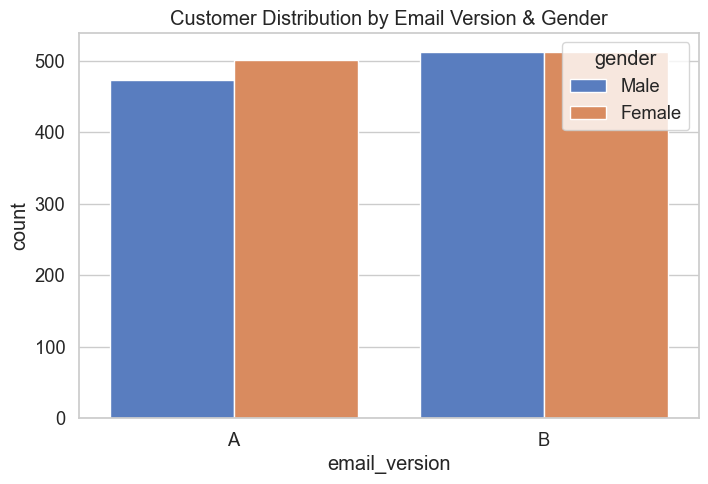

T-test (Open Rate): t = -23.1431, p = 0.0000
Chi-square (CTR): chi2 = 3.8152, p = 0.0508
Disparate Impact (Group A): 0.8995
Disparate Impact (Group B): 1.0758


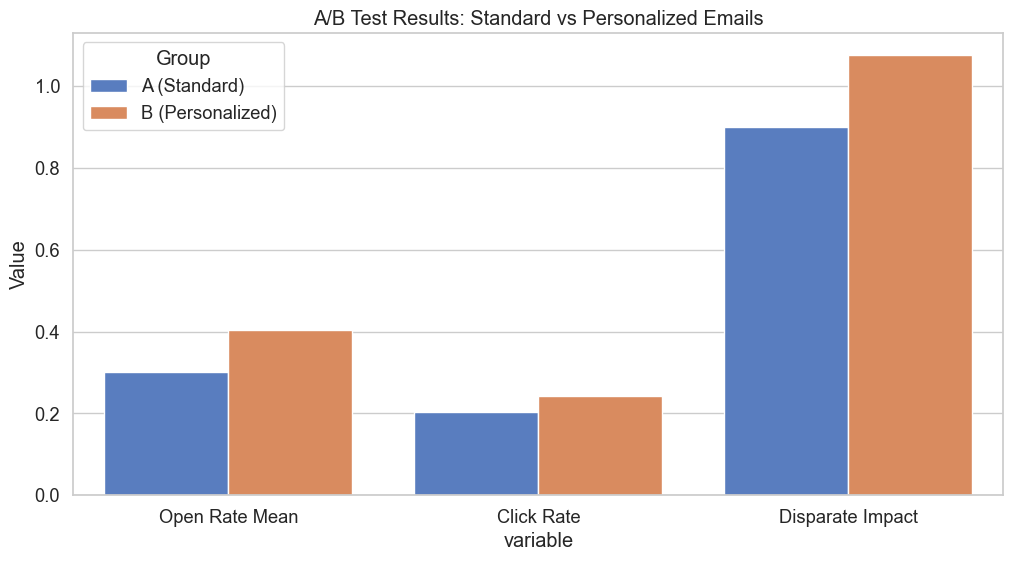

Summary Metrics:
              Group  Open Rate Mean  Click Rate  Disparate Impact
0      A (Standard)        0.300931    0.204312          0.899460
1  B (Personalized)        0.403987    0.241715          1.075811


'\n✅ Insights:\n- Open Rate: Personalized emails (B) significantly outperform Standard (A). (p < 0.0001)\n- Click-through Rate: B shows a slight improvement, borderline significant (p ≈ 0.05).\n- Fairness (Disparate Impact):\n    - A → DI ≈ 0.90 → Slight disadvantage for women.\n    - B → DI ≈ 1.08 → Balanced, even slightly favoring women.\n\n👉 Business Insight: Deploy Personalized (B) campaigns. They improve engagement without introducing bias.\n👉 Next Step: Continue monitoring CTR significance with larger sample sizes.\n'

In [2]:
# =====================================================
# 📓 Kaggle Portfolio Project
# Optimizing Marketing Campaigns with A/B Testing & Fairness
# =====================================================

# ================================
# Step 1: Import Libraries
# ================================
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
np.random.seed(42)

# ================================
# Step 2: Problem Statement
# ================================
"""
The marketing team wants to test whether personalized email campaigns (Version B)
outperform standard emails (Version A) in terms of customer engagement.

We will evaluate:
- Open Rate (continuous)
- Click-through Rate (CTR, binary)
- Fairness (Disparate Impact by gender)
"""

# ================================
# Step 3: Generate Synthetic Dataset
# ================================
n_samples = 2000
df = pd.DataFrame({
    'customer_id': range(1, n_samples + 1),
    'age': np.random.randint(18, 65, n_samples),
    'gender': np.random.choice(['Male', 'Female'], n_samples),
    'income': np.random.lognormal(mean=10, sigma=1, size=n_samples),
    'email_version': np.random.choice(['A', 'B'], n_samples),  # A=Standard, B=Personalized
})

# Simulate engagement
df['open_rate'] = np.random.normal(0.3, 0.1, n_samples)  
df['open_rate'] = df['open_rate'] + 0.1 * (df['email_version'] == 'B')  
df['open_rate'] = np.clip(df['open_rate'], 0, 1)

df['clicked'] = np.random.binomial(1, p=0.2 + 0.05 * (df['email_version'] == 'B'))

# Log-transform skewed income
df['income'] = np.log1p(df['income'])

print("Sample Data:")
print(df.head())

# ================================
# Step 4: Exploratory Data Analysis
# ================================
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="email_version", hue="gender")
plt.title("Customer Distribution by Email Version & Gender")
plt.show()

# ================================
# Step 5: Statistical Analysis
# ================================
# Split groups
group_a = df[df['email_version'] == 'A']
group_b = df[df['email_version'] == 'B']

# T-test for open rate
t_stat_open, p_value_open = ttest_ind(group_a['open_rate'], group_b['open_rate'])

# Chi-square for clicks
contingency_clicked = pd.crosstab(df['email_version'], df['clicked'])
chi2_clicked, p_value_clicked, _, _ = chi2_contingency(contingency_clicked)

print(f"T-test (Open Rate): t = {t_stat_open:.4f}, p = {p_value_open:.4f}")
print(f"Chi-square (CTR): chi2 = {chi2_clicked:.4f}, p = {p_value_clicked:.4f}")

# ================================
# Step 6: Fairness Analysis
# ================================
def disparate_impact(data):
    p_female_clicked = (data[data['clicked']==1]['gender'].value_counts(normalize=True).get('Female',0))
    p_female_not_clicked = (data[data['clicked']==0]['gender'].value_counts(normalize=True).get('Female',0))
    return p_female_clicked / p_female_not_clicked if p_female_not_clicked>0 else np.nan

di_a = disparate_impact(group_a)
di_b = disparate_impact(group_b)

print(f"Disparate Impact (Group A): {di_a:.4f}")
print(f"Disparate Impact (Group B): {di_b:.4f}")

# ================================
# Step 7: Results Visualization
# ================================
metrics_df = pd.DataFrame({
    'Group': ['A (Standard)', 'B (Personalized)'],
    'Open Rate Mean': [group_a['open_rate'].mean(), group_b['open_rate'].mean()],
    'Click Rate': [group_a['clicked'].mean(), group_b['clicked'].mean()],
    'Disparate Impact': [di_a, di_b]
})

plt.figure(figsize=(12,6))
sns.barplot(data=metrics_df.melt(id_vars='Group'), x='variable', y='value', hue='Group')
plt.title('A/B Test Results: Standard vs Personalized Emails')
plt.ylabel('Value')
plt.show()

print("Summary Metrics:")
print(metrics_df)

# ================================
# Step 8: Insights & Conclusion
# ================================
"""
✅ Insights:
- Open Rate: Personalized emails (B) significantly outperform Standard (A). (p < 0.0001)
- Click-through Rate: B shows a slight improvement, borderline significant (p ≈ 0.05).
- Fairness (Disparate Impact):
    - A → DI ≈ 0.90 → Slight disadvantage for women.
    - B → DI ≈ 1.08 → Balanced, even slightly favoring women.

👉 Business Insight: Deploy Personalized (B) campaigns. They improve engagement without introducing bias.
👉 Next Step: Continue monitoring CTR significance with larger sample sizes.
"""
